In [279]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns

### Importing Dataset

In [280]:
df = pd.read_csv('diabetes.csv')


In [281]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [283]:
df.shape


(768, 9)

In [284]:
# df.replace(to_replace = 0, value = df['Glucose'].mean(), inplace=True)
# df.replace(to_replace = 0, value = df['BloodPressure'].mean(), inplace=True)
# df.replace(to_replace = 0, value = df['SkinThickness'].mean(), inplace=True)
# df.replace(to_replace = 0, value = df['Insulin'].mean(), inplace=True)
# df.replace(to_replace = 0, value = df['BMI'].mean(), inplace=True)
columns_to_process = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_to_process:
    col_mean = df[col].mean()
    df[col] = df[col].replace(0, int(col_mean)) 

In [285]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [275]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [289]:
df_x = df.drop(columns='Outcome', axis=1)
df_y = df['Outcome']


In [290]:
# Data Scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaledX = scale.fit_transform(df_x)


In [291]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaledX, df_y, test_size=0.2, random_state=42)

In [292]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=7,  # Number of neighbors to consider (you can tune this)
    algorithm='auto',
    
)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [293]:
cs = metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",cs)

Confusion matrix: 
 [[82  8]
 [25 21]]


In [294]:
ac = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score: ",ac)

Accuracy score:  0.7573529411764706


In [295]:
er = 1-ac
print("Error rate: ",er)

Error rate:  0.24264705882352944


In [296]:
p = metrics.precision_score(y_test,y_pred)
print("Precision: ", p)

Precision:  0.7241379310344828


In [297]:
cr = metrics.classification_report(y_test,y_pred)
print("Classification report: \n\n", cr)

Classification report: 

               precision    recall  f1-score   support

           0       0.77      0.91      0.83        90
           1       0.72      0.46      0.56        46

    accuracy                           0.76       136
   macro avg       0.75      0.68      0.70       136
weighted avg       0.75      0.76      0.74       136



Certainly! Here are explanations for `accuracy_score`, `precision_score`, and `recall_score`:

1. **Accuracy Score (`accuracy_score`):**
   - Accuracy is a measure of how many of the total predictions made by the model are correct. It's calculated as the ratio of correct predictions to the total number of predictions. The formula is:
   
   ![Accuracy Score Formula](https://latex.codecogs.com/gif.latex?Accuracy%20%3D%20%5Cfrac%7B%5Ctext%7BCorrect%20Predictions%7D%7D%7B%5Ctext%7BTotal%20Predictions%7D%7D)
   
   - Accuracy gives an overall measure of how well the model performs in terms of both true positives and true negatives. However, it may not be the best metric if the classes in your dataset are imbalanced. In such cases, a high accuracy score can be misleading.

2. **Precision Score (`precision_score`):**
   - Precision is a measure of how many of the positive predictions made by the model are actually correct. It focuses on minimizing false positives. The formula is:
   
   ![Precision Score Formula](https://latex.codecogs.com/gif.latex?Precision%20%3D%20%5Cfrac%7B%5Ctext%7BTrue%20Positives%7D%7D%7B%5Ctext%7BTrue%20Positives%7D%20&plus;%20%5Ctext%7BFalse%20Positives%7D%7D)
   
   - Precision is important when you want to ensure that the positive predictions made by your model are accurate and not resulting in too many false alarms.

3. **Recall Score (`recall_score`):**
   - Recall, also known as Sensitivity or True Positive Rate, is a measure of how many of the actual positive cases were correctly predicted by the model
Certainly, here's more information about the recall score:

**Recall Score (Sensitivity or True Positive Rate):**

Recall, also known as Sensitivity or True Positive Rate, is a metric that evaluates a model's ability to correctly identify positive instances (e.g., cases where an event or condition is present). It's particularly important when minimizing false negatives (i.e., avoiding cases where the model fails to detect positive instances).

The formula for Recall is:

\[ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} \]

- True Positives (TP) are the cases where the model correctly predicted the positive class.
- False Negatives (FN) are the cases where the model incorrectly predicted the negative class when it was actually the positive class. In other words, the model missed detecting the positive instances.

Recall quantifies the ability of a model to find all the relevant instances in the dataset. A high recall means that the model is good at identifying positive cases, even if it results in some false positives (cases that are predicted as positive but are actually negative). 

Recall is particularly important in scenarios where missing a positive instance has significant consequences. For example, in medical diagnosis, you want to ensure that a model has a high recall to detect diseases, even if it means some false alarms. In fraud detection, a high recall helps catch as many fraudulent transactions as possible.

However, there's often a trade-off between precision and recall. Increasing recall tends to decrease precision because you may classify more instances as positive, including some false positives. The balance between precision and recall depends on the specific problem and the associated costs and benefits of true positives and false positives.

<AxesSubplot: >

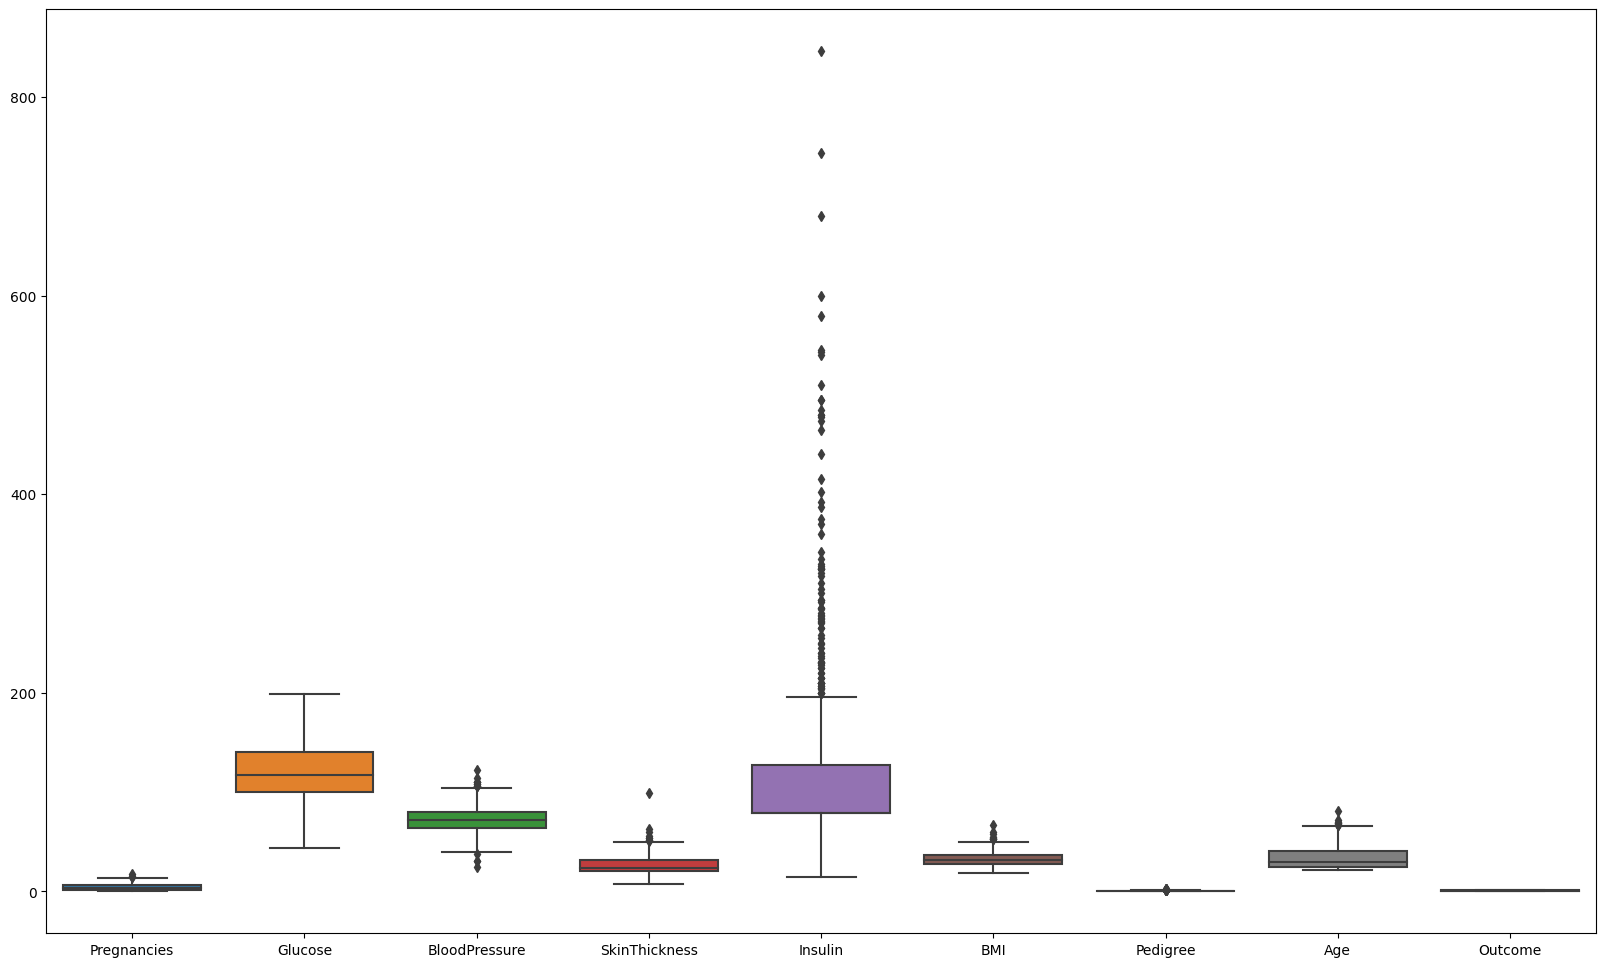

In [286]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,12))
# sns.boxplot(data = df)


In [287]:

# import numpy as np


# # Calculate the first quartile (Q1) and third quartile (Q3)
# Q1 = np.percentile(df, 25)
# Q3 = np.percentile(df, 75)

# # Calculate the interquartile range (IQR)
# IQR = Q3 - Q1

# # Define a lower and upper bound for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify and remove outliers
# outliers = (df < lower_bound) | (df > upper_bound)
# c_df = df[~outliers]
# -------------------------------------------------------------------------------------------------------------------------------
# import pandas as pd

# # Define the name of the column with outliers
# column_name = 'Insulin'

# # Calculate Q1 and Q3
# Q1 = df[column_name].quantile(0.25)
# Q3 = df[column_name].quantile(0.75)

# # Calculate IQR
# IQR = Q3 - Q1

# # Define the lower and upper bounds
# k = 1.5  # You can adjust this multiplier as needed
# LB = Q1 - k * IQR
# UB = Q3 + k * IQR

# # Remove rows with outliers directly from the original DataFrame
# df.drop(df[(df[column_name] < LB) | (df[column_name] > UB)].index, inplace=True)

# # Optionally, reset the index
# df.reset_index(drop=True, inplace=True)

# # df now contains your dataset with outliers removed based on the IQR

